In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors

import sklearn.datasets as ds

from sklearn.cluster import KMeans   #引入kmeans

In [41]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

##### 1、产生模拟数据
—— ds.make_blobs 生成聚类算法的测试数据，返回X和Y（Y是类别信息，因为不是监督算法，所以不是标签）。Y用0.1.2.3...类别信息进行标记，以区分数据类型

    -》n_samples：样本数量
    -》n_features：样本特征数
    -》centers：数据类别个数
    -》cluster_std：每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。

In [42]:
N = 1500
centers = 4   # 设置4个中心点
data,y = ds.make_blobs(N, n_features=2, centers=centers, random_state=28)   # 2特征，4类数据。 设置2特征只是为了方便画图
data2,y2 = ds.make_blobs(N, n_features=2, centers=centers,  random_state=28)

data3 = np.vstack((data[y == 0][:200], data[y == 1][:100], data[y == 2][:10], data[y == 3][:50]))   # 通过V向叠加，混合生成新X
y3 = np.array([0] * 200 + [1] * 100 + [2] * 10 + [3] * 50)   # 分配相应的新Y

##### 2、模型构建 + 训练 + 预测 + 评估

—— KMeans 聚类算法之一。一般在数据分析前期使用，选取适当的k，将数据分类后，然后分类研究不同聚类下数据的特点

    -》n_clusters：就是K值，中心点个数
    -》init：初始化方法，默认为kmeans++；random 随机，即原始算法；或自定义的ndarray
    
    -》*.inertia_ ：所有样本距离聚簇中心点的总距离和
    -》*.cluster_centers_ ：聚簇中心点

In [55]:
km = KMeans(n_clusters=centers, init='random',random_state=28)
km.fit(data)   # y可要可不要
y_hat = km.predict(data)   # 预测的y_hat不是标签值，而是分类类型

In [57]:
print ("所有样本距离聚簇中心点的总距离和:", km.inertia_)
print ("距离聚簇中心点的平均距离:", (km.inertia_ / N))
print ("聚簇中心点：\n",km.cluster_centers_)

所有样本距离聚簇中心点的总距离和: 2592.9990199021127
距离聚簇中心点的平均距离: 1.7286660132680751
聚簇中心点：
 [[-7.44342199e+00 -2.00152176e+00]
 [ 5.80338598e+00  2.75272962e-03]
 [-6.36176159e+00  6.94997331e+00]
 [ 4.34372837e+00  1.33977807e+00]]


In [45]:
y_hat2 = km.fit_predict(data2)   # 通常对一组新的数据预测时，最好加上fit
y_hat3 = km.fit_predict(data3)

# y_hat2 = km.predict(data2)
# y_hat3 = km.predict(data3)

In [46]:
def expandBorder(a, b):   # 用于扩展X、Y轴长度，使图形效果更好
    d = (b - a) * 0.1
    return a-d, b+d

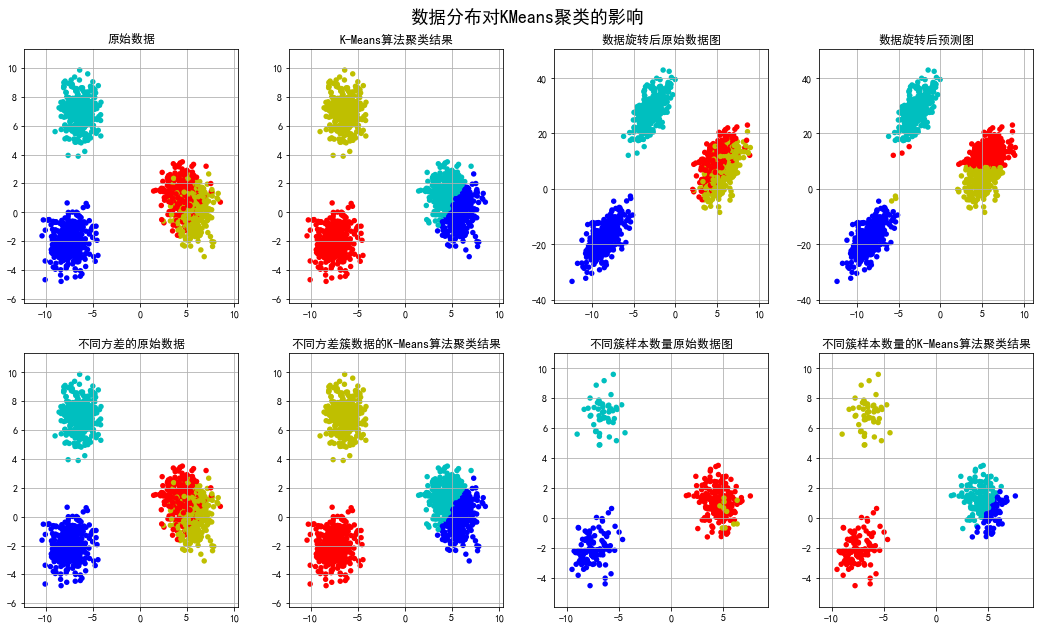

In [49]:
cm = mpl.colors.ListedColormap(list('rgbmyc'))   # 颜色
plt.figure(figsize=(15, 9), facecolor='w')

# ————————————————————————————————————

plt.subplot(241)
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data, axis=0)   # 因为data是二维数据，所以通过axis=0，获取每一列的最小值
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('原始数据')
plt.grid(True)

plt.subplot(242)
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('K-Means算法聚类结果')
plt.grid(True)

# ————————————————————————————————————

m = np.array([[1,1], [0.5,5]])
data_r = data.dot(m)   # —— .dot() 点乘，在此用于将原图形进行一定的偏移
y_r_hat = km.fit_predict(data_r)   # 对新数据先训练，后预测3

plt.subplot(243)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('数据旋转后原始数据图')
plt.grid(True)

plt.subplot(244)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('数据旋转后预测图')
plt.grid(True)

# ————————————————————————————————————

plt.subplot(245)
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')   # 第二组数据

x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同方差的原始数据')
plt.grid(True)

plt.subplot(246)
plt.scatter(data2[:, 0], data2[:, 1], c=y_hat2, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同方差簇数据的K-Means算法聚类结果')
plt.grid(True)

# ————————————————————————————————————

plt.subplot(247)
plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同簇样本数量原始数据图')
plt.grid(True)

plt.subplot(248)
plt.scatter(data3[:, 0], data3[:, 1], c=y_hat3, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同簇样本数量的K-Means算法聚类结果')
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
plt.show()